In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [70]:
data=pd.read_csv("titanic.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [71]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


In [73]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [74]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

<AxesSubplot:>

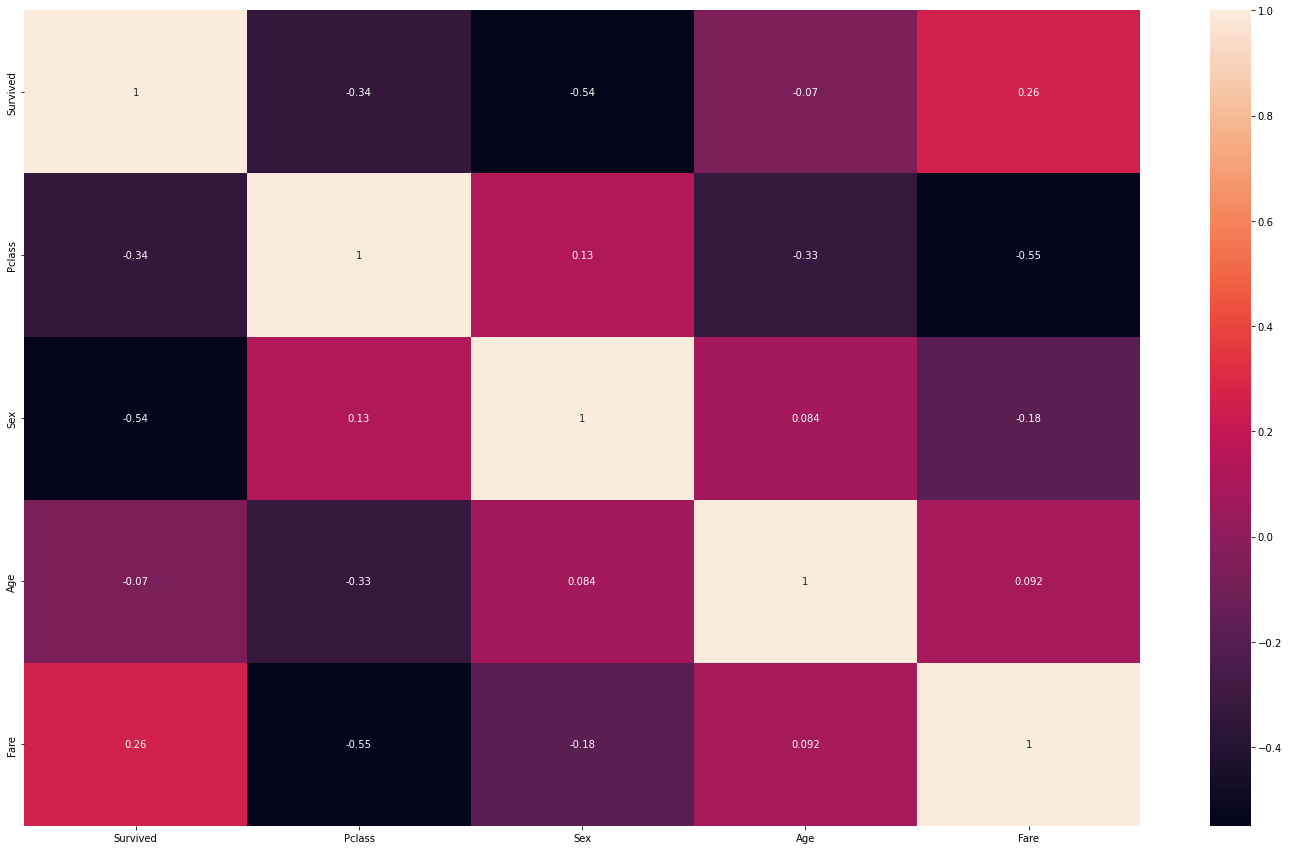

In [76]:
import seaborn as sen
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
sen.heatmap(data.corr(),annot=True)

In [77]:
poly=PolynomialFeatures(degree=5)
xpoly=poly.fit_transform(data.drop(['Survived'],axis=1))
poly.fit(xpoly,data['Survived'])


PolynomialFeatures(degree=5)

In [78]:
model=LinearRegression()
model.fit(xpoly,data['Survived'])

LinearRegression()

In [79]:
model.score(xpoly,data.Survived)

0.5144437952227998